# UAS Data Mining 
## Ardyn Rezky Fahreza - 2103551


In [561]:
#libarary untuk praproses dan EDA
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [562]:
# Library untuk klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [563]:
#Dataframe ini digunakan karena akan berpengaruh terhadap data rata-rata lama sekolah
df1 = pd.read_csv("D:\SEMESTER 3\DATA MINING\melek_huruf_diatas15.csv")
df1.head(10)

,prov,tahun,melek_huruf_diatas15
0,ACEH,2022,98.25
1,SUMATERA UTARA,2022,99.11
2,SUMATERA BARAT,2022,99.29
3,RIAU,2022,99.18
4,JAMBI,2022,98.1
5,SUMATERA SELATAN,2022,98.65
6,BENGKULU,2022,97.8
7,LAMPUNG,2022,97.25
8,KEP. BANGKA BELITUNG,2022,98.17
9,KEP. RIAU,2022,99.02


In [564]:
# Data frame ini saya ambil untuk melihat data harapan hidup
df2 = pd.read_csv("D:\SEMESTER 3\DATA MINING\ketidak_cukupan_pangan_prov.csv")
df2.head(10)

,tahun,pct_tdk_cukup_pangan,prov
0,2021,6.90,ACEH
1,2021,6.33,SUMATERA UTARA
2,2021,6.02,SUMATERA BARAT
3,2021,10.61,RIAU
4,2021,9.25,JAMBI
5,2021,6.82,SUMATERA SELATAN
6,2021,8.64,BENGKULU
7,2021,10.25,LAMPUNG
8,2021,11.05,KEP. BANGKA BELITUNG
9,2021,7.71,KEP. RIAU


In [565]:
# Data frame ini saya ambil untuk melihat data harapan hidup
df3 = pd.read_csv("D:\SEMESTER 3\DATA MINING\persen_perempuan_kerja_manajerial.csv")
df3.head(10)

,tahun,pct_perempuan_managerial,prov
0,2021,30.60,ACEH
1,2021,27.29,SUMATERA UTARA
2,2021,33.22,SUMATERA BARAT
3,2021,31.06,RIAU
4,2021,29.66,JAMBI
5,2021,31.15,SUMATERA SELATAN
6,2021,25.66,BENGKULU
7,2021,25.17,LAMPUNG
8,2021,29.39,KEP. BANGKA BELITUNG
9,2021,25.66,KEP. RIAU


In [566]:
# Data frame ini saya ambil untuk melihat data harapan hidup
df4 = pd.read_csv("D:\SEMESTER 3\DATA MINING\proporsi_kerja_informal_nonpertanian.csv")
df4.head(10)

,tahun,proporsi_kerja_informal_nonpertanian,prov
0,2021,46.29,ACEH
1,2021,47.53,SUMATERA UTARA
2,2021,51.56,SUMATERA BARAT
3,2021,44.07,RIAU
4,2021,45.97,JAMBI
5,2021,48.20,SUMATERA SELATAN
6,2021,51.00,BENGKULU
7,2021,56.70,LAMPUNG
8,2021,43.98,KEP. BANGKA BELITUNG
9,2021,30.93,KEP. RIAU


In [567]:
# Data frame ini saya ambil untuk melihat data pengeluaran perkapita
df5 = pd.read_csv("D:\SEMESTER 3\DATA MINING\jumlah_naik_haji.csv")
df5.head(10)

,prov,tahun,jumlah_naik_haji
0,ACEH,2016,3135.0
1,SUMATERA UTARA,2016,6529.0
2,SUMATERA BARAT,2016,3576.0
3,RIAU,2016,4032.0
4,JAMBI,2016,2100.0
5,SUMATERA SELATAN,2016,5082.0
6,BENGKULU,2016,1283.0
7,LAMPUNG,2016,5010.0
8,KEP. BANGKA BELITUNG,2016,729.0
9,KEP. RIAU,2016,793.0


In [568]:
# Data frame ini saya ambil untuk melihat data pengeluaran perkapita
df6 = pd.read_csv("D:\SEMESTER 3\DATA MINING\persen_rumah_menyewa.csv")
df6.head(10)

,tahun,persen_rumah_menyewa,prov
0,2021,6.86,ACEH
1,2021,14.13,SUMATERA UTARA
2,2021,11.37,SUMATERA BARAT
3,2021,11.82,RIAU
4,2021,5.95,JAMBI
5,2021,6.18,SUMATERA SELATAN
6,2021,7.03,BENGKULU
7,2021,3.92,LAMPUNG
8,2021,7.31,KEP. BANGKA BELITUNG
9,2021,25.95,KEP. RIAU


In [569]:
# Data frame ini saya ambil untuk melihat data pengeluaran perkapita
df7 = pd.read_csv("D:\SEMESTER 3\DATA MINING\pmi.csv")
df7.head(10)

,prov,tahun,kategori_pmi
0,ACEH,2022,TINGGI
1,SUMATERA UTARA,2022,TINGGI
2,SUMATERA BARAT,2022,TINGGI
3,RIAU,2022,TINGGI
4,JAMBI,2022,TINGGI
5,SUMATERA SELATAN,2022,TINGGI
6,BENGKULU,2022,TINGGI
7,LAMPUNG,2022,TINGGI
8,KEP. BANGKA BELITUNG,2022,TINGGI
9,KEP. RIAU,2022,TINGGI


### Melihat type data dan mengecek nilai null pada df1

In [570]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   prov                  315 non-null    object
 1   tahun                 315 non-null    int64 
 2   melek_huruf_diatas15  315 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.5+ KB


In [571]:
df1.isnull().sum()

prov                    0
tahun                   0
melek_huruf_diatas15    0
dtype: int64

### Melihat type data dan mengecek nilai null pada df2

In [572]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tahun                 175 non-null    int64  
 1   pct_tdk_cukup_pangan  175 non-null    float64
 2   prov                  175 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [573]:
df2.isnull().sum()

tahun                   0
pct_tdk_cukup_pangan    0
prov                    0
dtype: int64

### Melihat type data dan mengecek nilai null pada df3

In [574]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tahun                     245 non-null    int64  
 1   pct_perempuan_managerial  245 non-null    float64
 2   prov                      245 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [575]:
df3.isnull().sum()

tahun                       0
pct_perempuan_managerial    0
prov                        0
dtype: int64

### Melihat type data dan mengecek nilai null pada df4

In [576]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tahun                                 245 non-null    int64  
 1   proporsi_kerja_informal_nonpertanian  245 non-null    float64
 2   prov                                  245 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [577]:
df4.isnull().sum()

tahun                                   0
proporsi_kerja_informal_nonpertanian    0
prov                                    0
dtype: int64

### Melihat type data dan mengecek nilai null pada df5

In [578]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prov              245 non-null    object 
 1   tahun             245 non-null    int64  
 2   jumlah_naik_haji  238 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [579]:
df5.isnull().sum()

prov                0
tahun               0
jumlah_naik_haji    7
dtype: int64

### Mengisi data null pada tabek jumlah_naik_haji

In [580]:
df5['jumlah_naik_haji'].fillna(0, inplace = True)

### Melihat type data dan mengecek nilai null pada df6

In [581]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tahun                 245 non-null    int64  
 1   persen_rumah_menyewa  245 non-null    float64
 2   prov                  245 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [582]:
df6.isnull().sum()

tahun                   0
persen_rumah_menyewa    0
prov                    0
dtype: int64

### Melihat type data dan mengecek nilai null pada df7

In [583]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prov          442 non-null    object
 1   tahun         442 non-null    int64 
 2   kategori_pmi  442 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.5+ KB


In [584]:
df7.isnull().sum()

prov            0
tahun           0
kategori_pmi    0
dtype: int64

## Menggabungkan tiap dataframe ke satu dataframe

In [585]:
df_gabungan = df7
# df_gabungan.set_index('prov').join(df1.set_index('prov'), how = 'outer')
df_gabungan = pd.merge(df1, df_gabungan, how="left", on=("prov", "tahun"))
df_gabungan = pd.merge(df2, df_gabungan, how="left", on=("tahun", "prov"))
df_gabungan = pd.merge(df3, df_gabungan, how="left", on=("tahun", "prov"))
df_gabungan = pd.merge(df4, df_gabungan, how="left", on=("tahun", "prov"))
df_gabungan = pd.merge(df5, df_gabungan, how="left", on=("prov"))
df_gabungan = pd.merge(df6, df_gabungan, how="left", on=("prov"))
df_gabungan.head(10)

,tahun,persen_rumah_menyewa,prov,tahun_x,jumlah_naik_haji,tahun_y,proporsi_kerja_informal_nonpertanian,pct_perempuan_managerial,pct_tdk_cukup_pangan,melek_huruf_diatas15,kategori_pmi
0,2021,6.86,ACEH,2016,3135.0,2021,46.29,30.60,6.90,98.24,TINGGI
1,2021,6.86,ACEH,2016,3135.0,2020,47.59,32.61,8.58,98.25,TINGGI
2,2021,6.86,ACEH,2016,3135.0,2019,41.31,26.13,9.41,98.21,TINGGI
3,2021,6.86,ACEH,2016,3135.0,2018,43.06,20.56,8.68,98.03,TINGGI
4,2021,6.86,ACEH,2016,3135.0,2017,42.27,20.80,8.40,97.94,TINGGI
5,2021,6.86,ACEH,2016,3135.0,2016,41.64,18.18,NaN,NaN,NaN
6,2021,6.86,ACEH,2016,3135.0,2015,40.51,15.47,NaN,NaN,NaN
7,2021,6.86,ACEH,2015,3145.0,2021,46.29,30.60,6.90,98.24,TINGGI
8,2021,6.86,ACEH,2015,3145.0,2020,47.59,32.61,8.58,98.25,TINGGI
9,2021,6.86,ACEH,2015,3145.0,2019,41.31,26.13,9.41,98.21,TINGGI


## Melihat data yang null pada df_gabungan

In [586]:
df_gabungan.isnull().sum()

tahun                                      0
persen_rumah_menyewa                       0
prov                                       0
tahun_x                                    0
jumlah_naik_haji                           0
tahun_y                                    0
proporsi_kerja_informal_nonpertanian       0
pct_perempuan_managerial                   0
pct_tdk_cukup_pangan                    3430
melek_huruf_diatas15                    3430
kategori_pmi                            3675
dtype: int64

## Mengubah nilai kategori_pmi ke angka

In [587]:
df_gabungan.kategori_pmi = np.where(df_gabungan.kategori_pmi == 'SANGAT TINGGI', 5 , df_gabungan.kategori_pmi)
df_gabungan.kategori_pmi = np.where(df_gabungan.kategori_pmi == 'TINGGI', 4, df_gabungan.kategori_pmi)
df_gabungan.kategori_pmi = np.where(df_gabungan.kategori_pmi == 'SEDANG',3 , df_gabungan.kategori_pmi)
df_gabungan.kategori_pmi = np.where(df_gabungan.kategori_pmi == 'RENDAH', 2, df_gabungan.kategori_pmi)
df_gabungan.kategori_pmi = np.where(df_gabungan.kategori_pmi == 'SANGAT RENDAH',1 , df_gabungan.kategori_pmi)

### Mengisi nilai null dengan pada tabel-tabel yang kosong

In [588]:
# df_gabungan['proporsi_kerja_informal_nonpertanian'].fillna(0, inplace = True)

df_gabungan['proporsi_kerja_informal_nonpertanian'].fillna(df_gabungan.groupby(["prov"])['proporsi_kerja_informal_nonpertanian'].transform("mean"), inplace = True)
df_gabungan['proporsi_kerja_informal_nonpertanian'] = round(df_gabungan['proporsi_kerja_informal_nonpertanian']) # membulatkan data


df_gabungan['jumlah_naik_haji'].fillna(0, inplace = True)
# df_gabungan['pct_perempuan_managerial'].fillna(0, inplace = True)

df_gabungan['pct_perempuan_managerial'].fillna(df_gabungan.groupby(["prov"])['pct_perempuan_managerial'].transform("mean"), inplace = True)
df_gabungan['pct_perempuan_managerial'] = round(df_gabungan['pct_perempuan_managerial']) # membulatkan data

df_gabungan['pct_tdk_cukup_pangan'].fillna(df_gabungan.groupby(["prov"])['pct_tdk_cukup_pangan'].transform("mean"), inplace = True)
df_gabungan['pct_tdk_cukup_pangan'] = round(df_gabungan['pct_tdk_cukup_pangan']) # membulatkan data

# df_gabungan['melek_huruf_diatas15'].fillna(df_gabungan.groupby(["tahun"])['melek_huruf_diatas15'].transform("mean"), inplace = True)
# df_gabungan['melek_huruf_diatas15'] = round(df_gabungan['melek_huruf_diatas15']) # membulatkan data


# df_gabungan['pct_tdk_cukup_pangan'].fillna(0, inplace = True)
df_gabungan['melek_huruf_diatas15'].fillna(0, inplace = True)

df_gabungan['kategori_pmi'].fillna(0, inplace = True)

## Mengubah tipe data kategori_pmi ke integer

In [589]:
df_gabungan["kategori_pmi"] = df_gabungan["kategori_pmi"].astype("int64")

In [590]:
df_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12005 entries, 0 to 12004
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tahun                                 12005 non-null  int64  
 1   persen_rumah_menyewa                  12005 non-null  float64
 2   prov                                  12005 non-null  object 
 3   tahun_x                               12005 non-null  int64  
 4   jumlah_naik_haji                      12005 non-null  float64
 5   tahun_y                               12005 non-null  int64  
 6   proporsi_kerja_informal_nonpertanian  12005 non-null  float64
 7   pct_perempuan_managerial              12005 non-null  float64
 8   pct_tdk_cukup_pangan                  12005 non-null  float64
 9   melek_huruf_diatas15                  12005 non-null  object 
 10  kategori_pmi                          12005 non-null  int64  
dtypes: float64(5), 

In [591]:
df_gabungan.isnull().sum()

tahun                                   0
persen_rumah_menyewa                    0
prov                                    0
tahun_x                                 0
jumlah_naik_haji                        0
tahun_y                                 0
proporsi_kerja_informal_nonpertanian    0
pct_perempuan_managerial                0
pct_tdk_cukup_pangan                    0
melek_huruf_diatas15                    0
kategori_pmi                            0
dtype: int64

In [592]:
df_gabungan.head(10)

,tahun,persen_rumah_menyewa,prov,tahun_x,jumlah_naik_haji,tahun_y,proporsi_kerja_informal_nonpertanian,pct_perempuan_managerial,pct_tdk_cukup_pangan,melek_huruf_diatas15,kategori_pmi
0,2021,6.86,ACEH,2016,3135.0,2021,46.0,31.0,7.0,98.24,4
1,2021,6.86,ACEH,2016,3135.0,2020,48.0,33.0,9.0,98.25,4
2,2021,6.86,ACEH,2016,3135.0,2019,41.0,26.0,9.0,98.21,4
3,2021,6.86,ACEH,2016,3135.0,2018,43.0,21.0,9.0,98.03,4
4,2021,6.86,ACEH,2016,3135.0,2017,42.0,21.0,8.0,97.94,4
5,2021,6.86,ACEH,2016,3135.0,2016,42.0,18.0,8.0,0,0
6,2021,6.86,ACEH,2016,3135.0,2015,41.0,15.0,8.0,0,0
7,2021,6.86,ACEH,2015,3145.0,2021,46.0,31.0,7.0,98.24,4
8,2021,6.86,ACEH,2015,3145.0,2020,48.0,33.0,9.0,98.25,4
9,2021,6.86,ACEH,2015,3145.0,2019,41.0,26.0,9.0,98.21,4


## Menghapus tabel tahun_x dan tahun_y karena sudah ada kolom tahun

In [593]:
df_gabungan = df_gabungan.drop(['tahun_x', 'tahun_y'], axis =1)

## Analisis dan EDA

<AxesSubplot:xlabel='prov'>

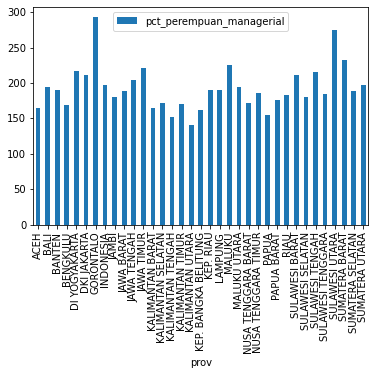

In [613]:
df_groups = df3.groupby(['prov'])[['pct_perempuan_managerial']].sum()

#create bar plot by group
df_groups.plot(kind='bar')

dilihat dari plot diatas bahwa yang memiliki persentase perempuan_managerial adalah prov sulawesi utara

<AxesSubplot:xlabel='prov'>

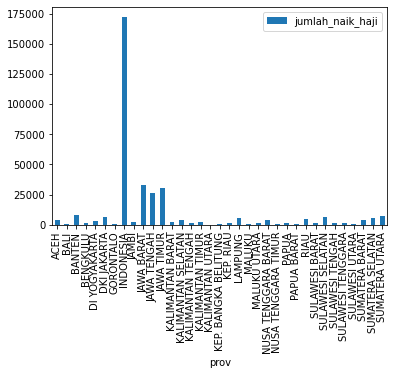

In [611]:
df_groups = df_gabungan.groupby(['prov'])[['jumlah_naik_haji']].mean()

#create bar plot by group
df_groups.plot(kind='bar')

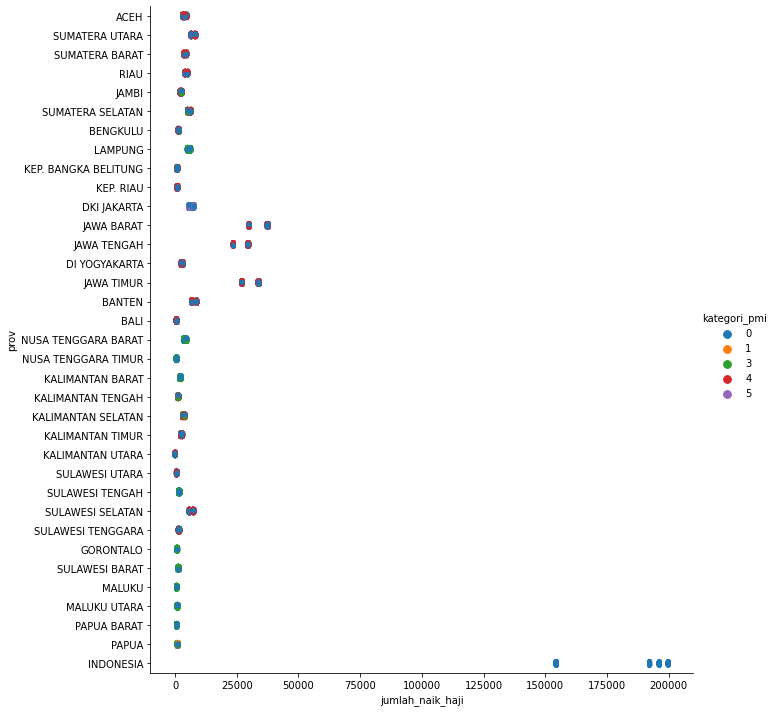

In [618]:
sns.catplot(x="jumlah_naik_haji", y="prov", hue="kategori_pmi", data=df_gabungan, height=10)

dapat dilihat dari plot diatas bahwa angka jumlah_naik_haji yang tinggi mempengaruhi tingkat kategori pmi

# Klasifikasi

## Kelas Target

In [596]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_gabungan.kategori_pmi)
Y = le.transform(df_gabungan.kategori_pmi) 

In [597]:
list(le.classes_)

[0, 1, 3, 4, 5]

## Menghapus tabel kategori_pmi dan prov untuk keperluan klasifikasi

In [598]:
X = df_gabungan.drop(["kategori_pmi"],axis=1)
X = df_gabungan.drop(["prov"],axis=1)

## Split Data

In [599]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=None)

## Metode Naive Bayes

In [601]:
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.9441899208663057
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       769
           1       1.00      1.00      1.00        10
           2       0.91      0.90      0.90       622
           3       0.93      0.93      0.93       951
           4       0.81      0.90      0.85        49

    accuracy                           0.94      2401
   macro avg       0.93      0.95      0.94      2401
weighted avg       0.94      0.94      0.94      2401



## Metode Decision Tree

In [602]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       769
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00       622
           3       1.00      1.00      1.00       951
           4       1.00      1.00      1.00        49

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401

